# Imports

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Data Exploration

In [2]:
df = pd.read_csv('data.csv',parse_dates=True, na_values={'price': 0,'bedrooms': 0,})
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4598 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4598.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.579059e+05,3.402349,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.639299e+05,0.906273,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Data Cleaning, Analysis and Visualization

In [6]:
df.isna().sum()

date              0
price            49
bedrooms          2
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(4549, 18)

## Remove outliers

In [9]:
# Compute z-scores for selected columns
df['price_zscore'] = zscore(df['price'])
df['sqft_living_zscore'] = zscore(df['sqft_living'])
df['sqft_lot_zscore'] = zscore(df['sqft_lot'])
df['sqft_above_zscore'] = zscore(df['sqft_above'])
df['sqft_basement_zscore'] = zscore(df['sqft_basement'])

# Filter the DataFrame based on z-score criteria to remove outliers
df = df[
    (df['price_zscore'].abs() < 3) &
    (df['sqft_living_zscore'].abs() < 3) &
    (df['sqft_lot_zscore'].abs() < 3) &
    (df['sqft_above_zscore'].abs() < 3) &
    (df['sqft_basement_zscore'].abs() < 3)
]

# Drop the z-score columns if no longer needed
df = df.drop(['price_zscore', 'sqft_living_zscore', 'sqft_lot_zscore', 'sqft_above_zscore', 'sqft_basement_zscore'], axis=1)


In [10]:
df.shape

(4361, 18)

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.361000e+03,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000
mean,5.188209e+05,3.362990,2.110640,2042.627608,10688.168998,1.504357,0.004815,0.200413,3.453336,1753.710846,288.916762,1970.325384,813.535198
std,2.837418e+05,0.882343,0.720719,797.319997,12729.773715,0.538307,0.069234,0.702035,0.675718,749.303444,416.966221,29.853931,980.300135
min,7.800000e+03,1.000000,0.750000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1440.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1170.000000,0.000000,1950.000000,0.000000
50%,4.550000e+05,3.000000,2.250000,1940.000000,7500.000000,1.500000,0.000000,0.000000,3.000000,1550.000000,0.000000,1974.000000,0.000000
75%,6.395000e+05,4.000000,2.500000,2540.000000,10375.000000,2.000000,0.000000,0.000000,4.000000,2220.000000,590.000000,1996.000000,1999.000000
max,2.199900e+06,9.000000,5.750000,4960.000000,120661.000000,3.500000,1.000000,4.000000,5.000000,4380.000000,1690.000000,2014.000000,2014.000000


## Remove unused features

In [12]:
df.country.nunique()
# there is only one country in the dataset

1

In [13]:
df[df['statezip'].str[0:2] != 'WA']
# there is only one state in the dataset which is WA

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [14]:
df.city.nunique()

44

In [15]:
df.drop(columns=["country", "statezip","street",'date','city'], inplace=True)

## Analysis and Visualization

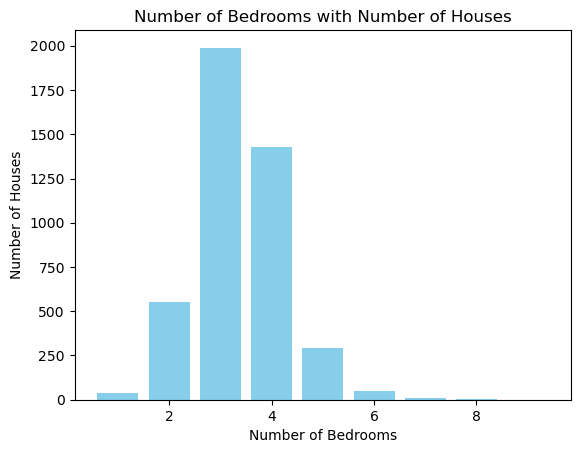

In [16]:
bedroom_counts = df['bedrooms'].value_counts()
plt.bar(bedroom_counts.index, bedroom_counts.values, color='skyblue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses')
plt.title('Number of Bedrooms with Number of Houses')
plt.show()


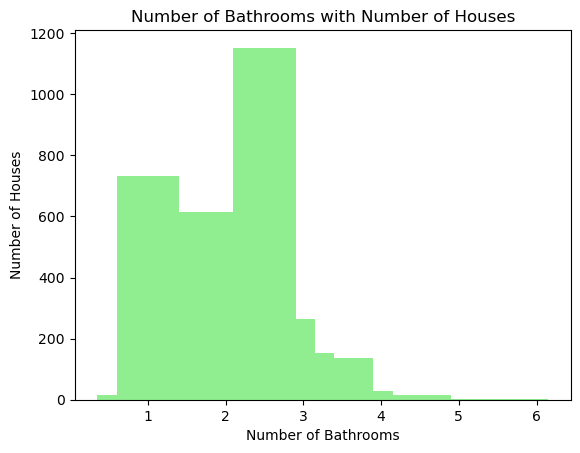

In [17]:
bathroom_counts = df['bathrooms'].value_counts()

plt.bar(bathroom_counts.index, bathroom_counts.values, color='lightgreen')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses')
plt.title('Number of Bathrooms with Number of Houses')
plt.show()


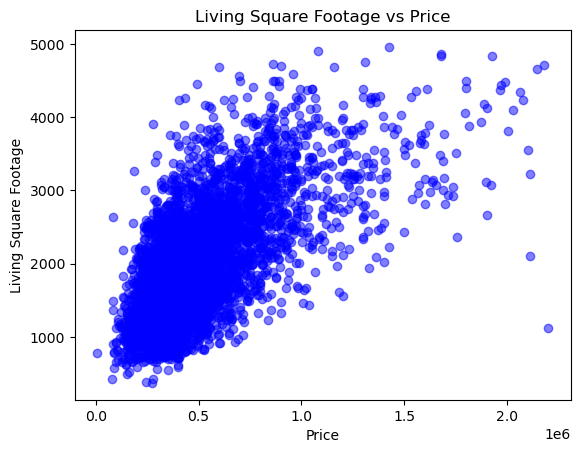

In [18]:
plt.scatter(df['price'], df['sqft_living'], color='blue', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Living Square Footage')
plt.title('Living Square Footage vs Price')
plt.show()

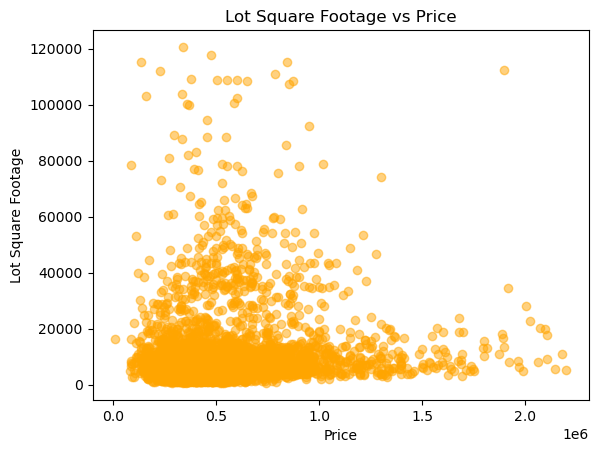

In [19]:
plt.scatter(df['price'], df['sqft_lot'], color='orange', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Lot Square Footage')
plt.title('Lot Square Footage vs Price')
plt.show()

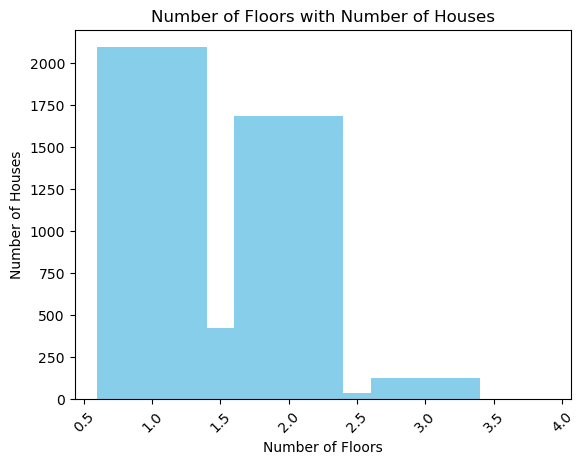

In [20]:
floor_counts = df['floors'].value_counts().sort_index()

plt.bar(floor_counts.index, floor_counts.values, color='skyblue')
plt.xlabel('Number of Floors')
plt.ylabel('Number of Houses')
plt.title('Number of Floors with Number of Houses')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

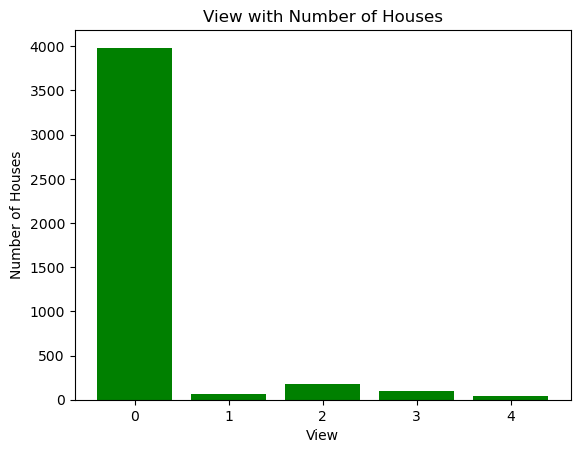

In [21]:
view_counts = df['view'].value_counts()
plt.bar(view_counts.index, view_counts.values, color='green')
plt.xlabel('View')
plt.ylabel('Number of Houses')
plt.title('View with Number of Houses')
plt.show()

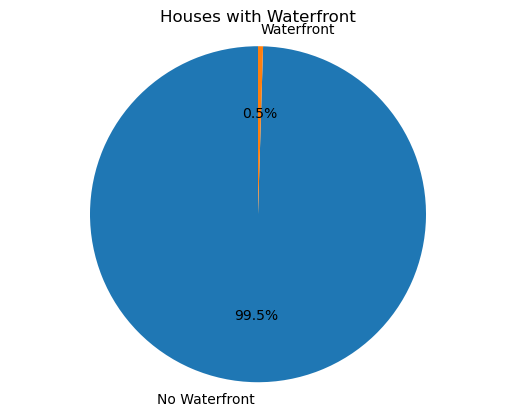

In [22]:
waterfront_counts = df['waterfront'].value_counts()
labels = ['No Waterfront', 'Waterfront']
plt.pie(waterfront_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Houses with Waterfront')
plt.axis('equal')
plt.show()

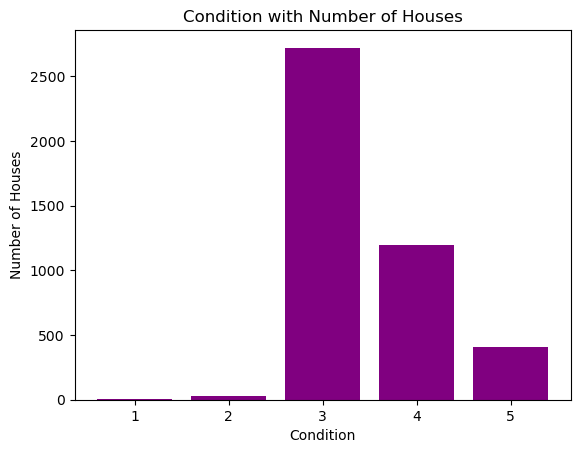

In [23]:
condition_counts = df['condition'].value_counts()
plt.bar(condition_counts.index, condition_counts.values, color='purple')
plt.xlabel('Condition')
plt.ylabel('Number of Houses')
plt.title('Condition with Number of Houses')
plt.show()

In [24]:
columns=df.columns
columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


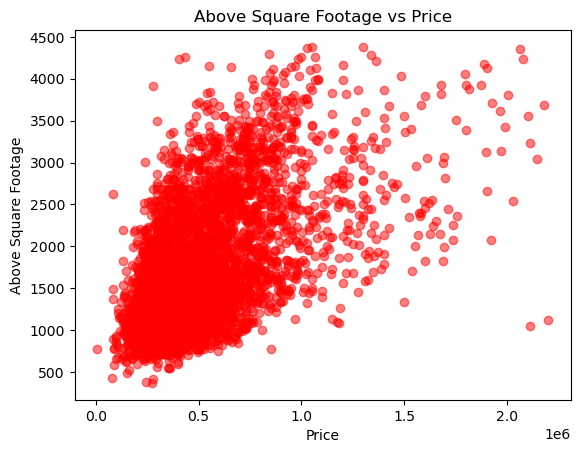

In [26]:
plt.scatter(df['price'], df['sqft_above'], color='red', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Above Square Footage')
plt.title('Above Square Footage vs Price')
plt.show()

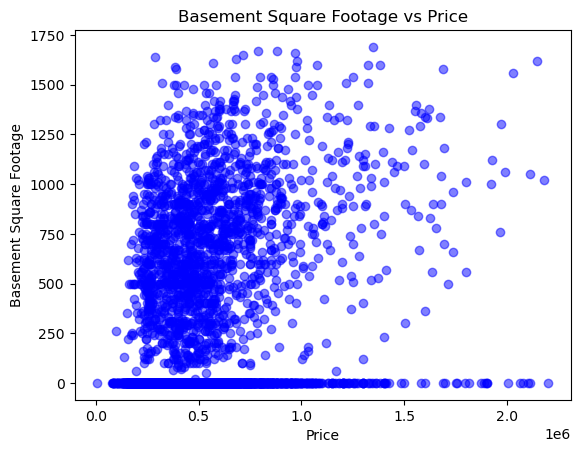

In [27]:
plt.scatter(df['price'], df['sqft_basement'], color='blue', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Basement Square Footage')
plt.title('Basement Square Footage vs Price')
plt.show()

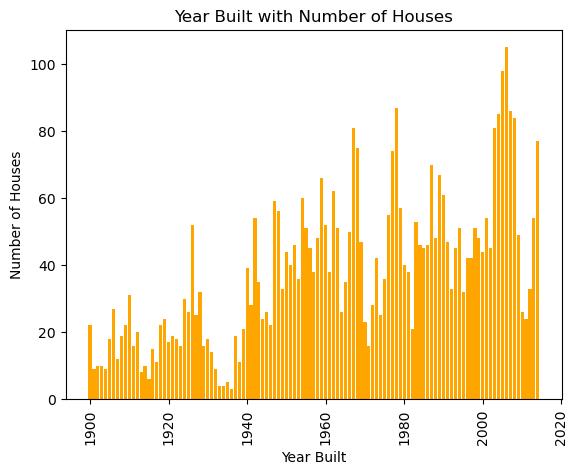

In [28]:
year_counts = df['yr_built'].value_counts().sort_index()

plt.bar(year_counts.index, year_counts.values, color='orange')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses')
plt.title('Year Built with Number of Houses')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

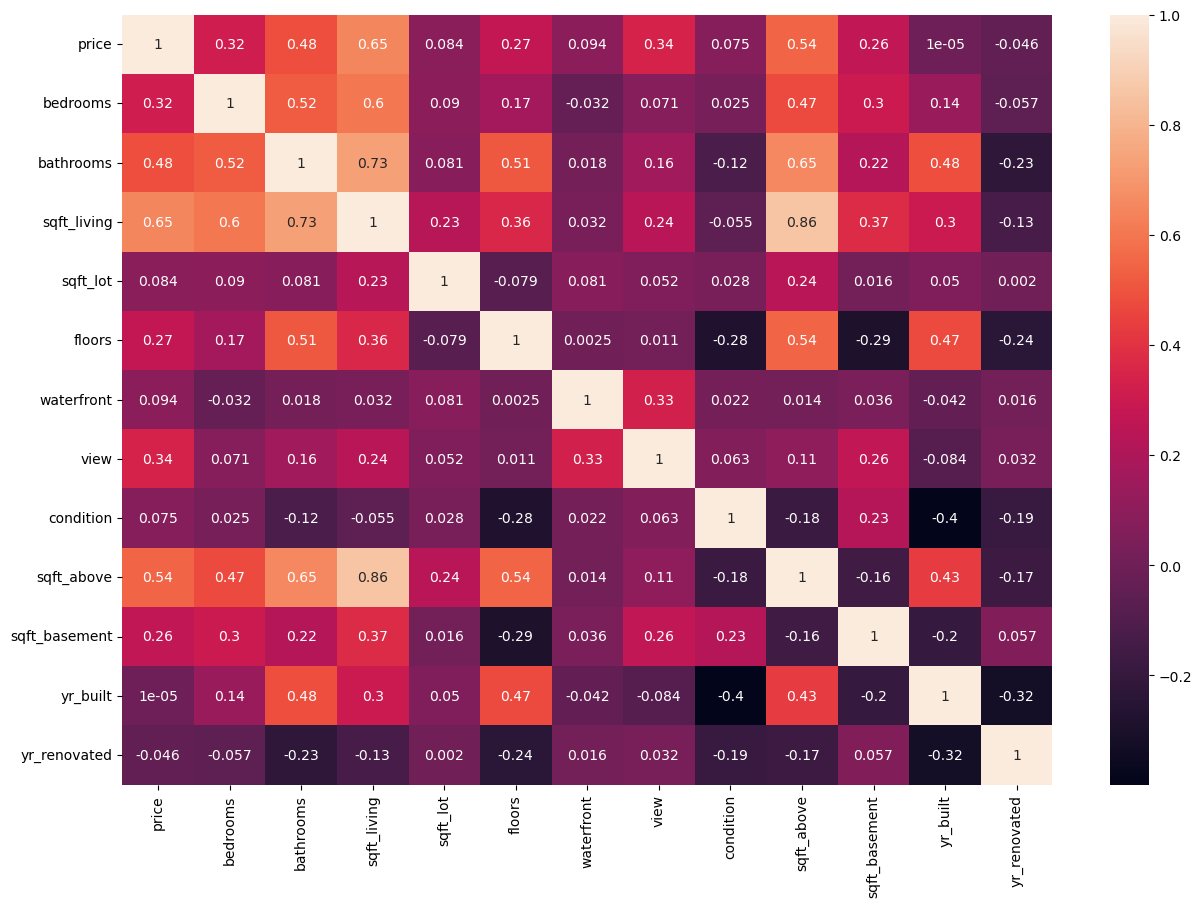

In [29]:
# Correlation Analysis
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True);

# Data Preprocessing

In [30]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [31]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


In [32]:
pd.set_option('display.max_columns', None)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


## Split Data

In [33]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =42)

## Feature Scaling (Standardization)

In [34]:

sc_X_1 = StandardScaler()
X_train[:, 0:5] = sc_X_1.fit_transform(X_train[:, 0:5])
X_test[:, 0:5] = sc_X_1.transform(X_test[:, 0:5])

sc_X_2 = StandardScaler()
X_train[:, 6:11] = sc_X_2.fit_transform(X_train[:, 6:11])
X_test[:, 6:11] = sc_X_2.transform(X_test[:, 6:11])

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Regression Models

## Multiple Linear Regression

### Training the model

In [35]:
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

LinearRegression()

### Evaluating the model

In [36]:
y_pred = multi_lr.predict(X_test)
y_train_pred = multi_lr.predict(X_train)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_lr_train)
print("R2 Test Score:", r2_lr_test)
mse_lr_train = mean_squared_error(y_train, y_train_pred)
mse_lr_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_lr_train)
print("Mean Squared Error of Test:", mse_lr_test)


R2 Train Score: 0.5279514495301159
R2 Test Score: 0.5092048284764241
Mean Squared Error of Train: 0.4720485504698843
Mean Squared Error of Test: 41777971956.35527


In [37]:
print(y_test[0])
print(sc_y.inverse_transform(y_pred.reshape(-1,1))[0])

455000.0
[422356.85742704]


## Decision Tree

### Training the model

In [38]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

### Evaluating the model

In [39]:
y_pred = dec_tree.predict(X_test)
y_train_pred = dec_tree.predict(X_train)
r2_tree_train = r2_score(y_train, y_train_pred)
r2_tree_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_tree_train)
print("R2 Test Score:", r2_tree_test)
mse_tree_train = mean_squared_error(y_train, y_train_pred)
mse_tree_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_tree_train)
print("Mean Squared Error of Test:", mse_tree_test)

R2 Train Score: 0.9999898477973206
R2 Test Score: 0.08729853020395584
Mean Squared Error of Train: 1.0152202679403277e-05
Mean Squared Error of Test: 77691914309.77986


## Random Forest

### Training the model

In [40]:
rdm_frst = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rdm_frst.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

### Evaluating the model

In [41]:
y_pred = rdm_frst.predict(X_test)
y_train_pred = rdm_frst.predict(X_train)
r2_frst_train = r2_score(y_train, y_train_pred)
r2_frst_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_frst_train)
print("R2 Test Score:", r2_frst_test)
mse_frst_train = mean_squared_error(y_train, y_train_pred)
mse_frst_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_frst_train)
print("Mean Squared Error of Test:", mse_frst_test)

R2 Train Score: 0.9347136900035975
R2 Test Score: 0.47520710649403053
Mean Squared Error of Train: 0.0652863099964025
Mean Squared Error of Test: 44671961053.988785


## Support Vector Regression

### Training the model

In [42]:
svr = SVR(kernel = 'linear',)
svr.fit(X_train, y_train)

SVR(kernel='linear')

### Evaluating the model

In [43]:
y_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)
r2_svr_train = r2_score(y_train, y_train_pred)
r2_svr_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_svr_train)
print("R2 Test Score:", r2_svr_test)
mse_svr_train = mean_squared_error(y_train, y_train_pred)
mse_svr_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_svr_train)
print("Mean Squared Error of Test:", mse_svr_test)

R2 Train Score: 0.5183877900120765
R2 Test Score: 0.49105387614852225
Mean Squared Error of Train: 0.4816122099879237
Mean Squared Error of Test: 43323036010.22972


# Comparing Models

In [44]:
models = pd.DataFrame({
    'Model': [
        'Multiple Linear Regression','Decision Tree',
        'Random Forest', 'Support Vector Regression'
    ],
    'Training R2 Score': [
        r2_lr_train,r2_tree_train,r2_frst_train,r2_svr_train
    ],
    'Training Mean Square Error': [
       mse_lr_train,mse_tree_train,mse_frst_train,mse_svr_train
    ],
    'Testing R2 Score': [
        r2_lr_test,r2_tree_test,r2_frst_test,r2_svr_test
    ],
    'Testing Mean Square Error': [
       mse_lr_test,mse_tree_test,mse_frst_test,mse_svr_test
    ]
})

In [45]:
models.sort_values(by='Training R2 Score', ascending=False)

,Model,Training R2 Score,Training Mean Square Error,Testing R2 Score,Testing Mean Square Error
1,Decision Tree,0.999990,0.000010,0.087299,7.769191e+10
2,Random Forest,0.934714,0.065286,0.475207,4.467196e+10
0,Multiple Linear Regression,0.527951,0.472049,0.509205,4.177797e+10
3,Support Vector Regression,0.518388,0.481612,0.491054,4.332304e+10


In [46]:
models.sort_values(by='Testing R2 Score', ascending=False).style.background_gradient(
        cmap='Blues')

,Model,Training R2 Score,Training Mean Square Error,Testing R2 Score,Testing Mean Square Error
0,Multiple Linear Regression,0.527951,0.472049,0.509205,41777971956.355270
3,Support Vector Regression,0.518388,0.481612,0.491054,43323036010.229721
2,Random Forest,0.934714,0.065286,0.475207,44671961053.988785
1,Decision Tree,0.999990,0.000010,0.087299,77691914309.779861


In [47]:
models.sort_values(by='Testing Mean Square Error', ascending=True).style.background_gradient(
        cmap='Blues')

,Model,Training R2 Score,Training Mean Square Error,Testing R2 Score,Testing Mean Square Error
0,Multiple Linear Regression,0.527951,0.472049,0.509205,41777971956.355270
3,Support Vector Regression,0.518388,0.481612,0.491054,43323036010.229721
2,Random Forest,0.934714,0.065286,0.475207,44671961053.988785
1,Decision Tree,0.999990,0.000010,0.087299,77691914309.779861
